In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
from tensorly.tenalg import khatri_rao
from tensorly.decomposition import parafac
import tensorly as tl
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Question 3 Tensor decomposition

## 1) Consider the following optimization problem:
\begin{equation}
argmin_{\lambda_r}||X - \hat{X}||^2_F \text{where} \hat{X} = \sum^R_r \lambda_r A_r^{(1)} \circ A_r^{(2)}  ... \dot A_r^{(d)}
\end{equation}
Where $A_r^{(i)}$ denotes the $r_{th}$ column of the matrix $A^{(i)}$. Find the closed-form solution for this optimization problem. You may assum that X and $A^{(i)}$ are known.

## **Answer**

\begin{equation}
\hat{X} = \sum^R_r \lambda_r A_r^{(1)} \circ A_r^{(2)}  ... \dot A_r^{(d)} = A \Lambda (C \odot B)^T \ \ \ \ \ (1)
\end{equation}

Where $\Lambda = \sum^R_r \lambda_r$ is a diagnoal matrix with the scalar values of $\lambda_r$. Substituting (1) into the main equation

\begin{equation}
||X - \hat{X}||^2 = ||X_{(1)} - A \Lambda (C \odot B)^T||^2  \ \ \ \ \ (2)
\end{equation}

Let $A \Lambda = \tilde{A}$ and $(C \odot B)^T = H$ so that (2) becomes

\begin{equation}
||X - \hat{X}||^2 = ||X_{(1)} - \tilde{A}H||^2  \ \ \ \ \ (3)
\end{equation}

Taking the derivative of (3) with respect to $\tilde{A}$

\begin{equation}
2(X_{(1)} - \tilde{A}H)H\\
= (2X_{(1)} - 2\tilde{A}H)H\\
= 2X_{(1)}H^T - 2\tilde{A}H^TH \ \ \ \ \ (4)
\end{equation}

Setting (4) equal to zero and solving for $\tilde{A}$

\begin{equation}
2X_{(1)}H^T - 2\tilde{A}H^TH = 0\\
2X_{(1)}H^T = 2\tilde{A}H^TH\\
X_{(1)}H^T = \tilde{A}H^TH\\
X_{(1)}(H^TH)^{-1}H^T = \tilde{A} \ \ \ \ \ \ \ (5)
\end{equation}

Plugging back in $A \Lambda = \tilde{A}$ into (5) and solving for $\Lambda$

\begin{equation}
X_{(1)}(H^TH)^{-1}H^T = A\Lambda\\
(X_{(1)}(H^TH)^{-1}H^T)A^{-1} = \Lambda \ \ \ \ \ (6)
\end{equation}

Therefore

\begin{equation}
\boxed{\sum^R_r \lambda_r = \Lambda = [X_{(1)}(H^TH)^{-1}H^T]A^{-1} \ \ \ \ \ \ \ \text{where}\ \ \ \  H = (C \odot B)^T} 
\end{equation}

# 2) 
In this part, a neuron activity dataset is given in the file ‘neurondata.mat’. Consider a recording of N neurons over K experimental trials. We assume neural activity is recorded at T time points within each trial. This dataset is naturally represented as a T×N×K array of firing rates, which is known in mathematics as a third-order tensor. Each element in this tensor, , denotes the firing rate of neuron n at time t within trial k. Here, the indices t, n, and k are in the range from 1 to 500, 50, and 100, respectively.

Perform CP decomposition on the dataset (use AIC criteria to find the optimal rank). Plot the first three column vectors for each factor matrix and interpret them.

In [3]:
data = loadmat('neurondata.mat')['input'].astype('float64')
data.shape

(500, 50, 100)

In [4]:
#convert numpy array to tensorly tensor
T = tl.tensor(data)

In [24]:
#function to calculate all AICs for each tensor
def find_lowest(t):
    #initialize lists to store errors for each rank of decomposition
    t_aic = []
    
    #try out up to 5 different ranks
    for r in range(1,9):
        #weights, and factors from each decomp on each tensor
        w, f = parafac(t, r, normalize_factors=True)
        
        #reconstruct from factors
        x = tl.kruskal_to_tensor((w,f))
       
        
        #calculate error in reconstruction
        e = err(t, x)
              
        #calculate AIC using rank as the penalization term instead of number of parameters as suggested by prof on Piazza
        t_aic.append(AIC(e, r))
    
    #return the 3 arrays each containing 20 different AIC values
    return t_aic

In [25]:
def err(orig, calc):
    diff = orig - calc
    err = (diff**2).sum()
    return err

In [26]:
def AIC(err, r):
    return 2*err + (2*r)

In [27]:
#get AIC values
aic =find_lowest(T)

/home/scott/anaconda3/lib/python3.7/site-packages/tensorly/backend/core.py:721: RuntimeWarning: invalid value encountered in sqrt
  S = np.where(np.abs(S) <= np.finfo(S.dtype).eps, 0, np.sqrt(S))
/home/scott/anaconda3/lib/python3.7/site-packages/tensorly/backend/core.py:722: RuntimeWarning: invalid value encountered in less_equal
  V = np.dot(matrix.T.conj(), U * np.where(np.abs(S) <= np.finfo(S.dtype).eps, 0, 1/S)[None, :])


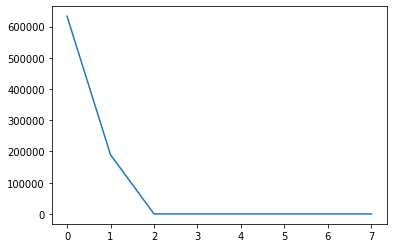

In [28]:
plt.figure()
plt.plot(range(len(aic)),aic)
plt.show()

In [37]:
#use the optimal rank from Part 1
np.argmin(aic)

2

In [65]:
#use CP decomp using 5 ranks since aic shows optimal rank 2 but required to plot 3 factors
w, f = parafac(T, 5, normalize_factors=True)

/home/scott/anaconda3/lib/python3.7/site-packages/tensorly/backend/core.py:721: RuntimeWarning: invalid value encountered in sqrt
  S = np.where(np.abs(S) <= np.finfo(S.dtype).eps, 0, np.sqrt(S))
/home/scott/anaconda3/lib/python3.7/site-packages/tensorly/backend/core.py:722: RuntimeWarning: invalid value encountered in less_equal
  V = np.dot(matrix.T.conj(), U * np.where(np.abs(S) <= np.finfo(S.dtype).eps, 0, 1/S)[None, :])


In [66]:
#weights and factor columns are not sorted in descending order - sort them in descending order
sorted_lambdas_and_indices = sorted(list(zip(range(len(w)), w)), key=lambda x: x[1], reverse=True)
sorted_idxs = [x[0] for x in sorted_lambdas_and_indices]
sorted_lambdas = [x[1] for x in sorted_lambdas_and_indices]
sorted_lambdas_and_indices

[(0, 708.5732212297819),
 (1, 559.8921838342437),
 (3, 343.4213366548741),
 (2, 225.23362712214387),
 (4, 142.8697560138856)]

In [67]:
#sort factor columns based of of weight orders
factor1 = f[0][:,sorted_idxs]
factor2 = f[1][:,sorted_idxs]
factor3 = f[2][:,sorted_idxs]

In [68]:
def plotit(f, kind, title):
    colors = ['red', 'green', 'blue']
    plt.subplots(nrows=3, ncols=1, figsize=(20,10))
    for i in range(3):
        if kind == 'line':
            plt.subplot(3,1,i+1)
            plt.plot(f[:,i], color=colors[i])
        
            
        elif kind == 'bar':
            plt.subplot(3,1,i+1)
            plt.bar(range(len(f[:,i])), f[:,i], color=colors[i], edgecolor='k')
        
            
        elif kind == 'scatter':
            plt.subplot(3,1,i+1)
            plt.scatter(range(len(f[:,i])), f[:,i], color=colors[i], edgecolor='k')
    plt.suptitle(title)
    plt.show()

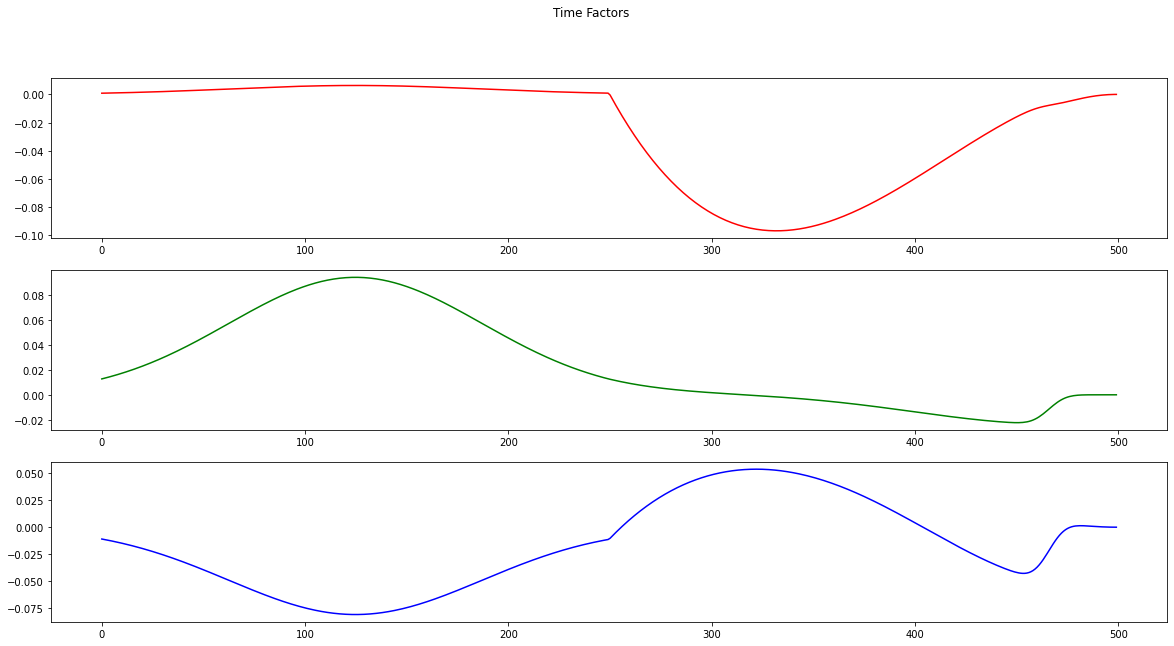

In [69]:
plotit(factor1, kind='line', title='Time Factors')

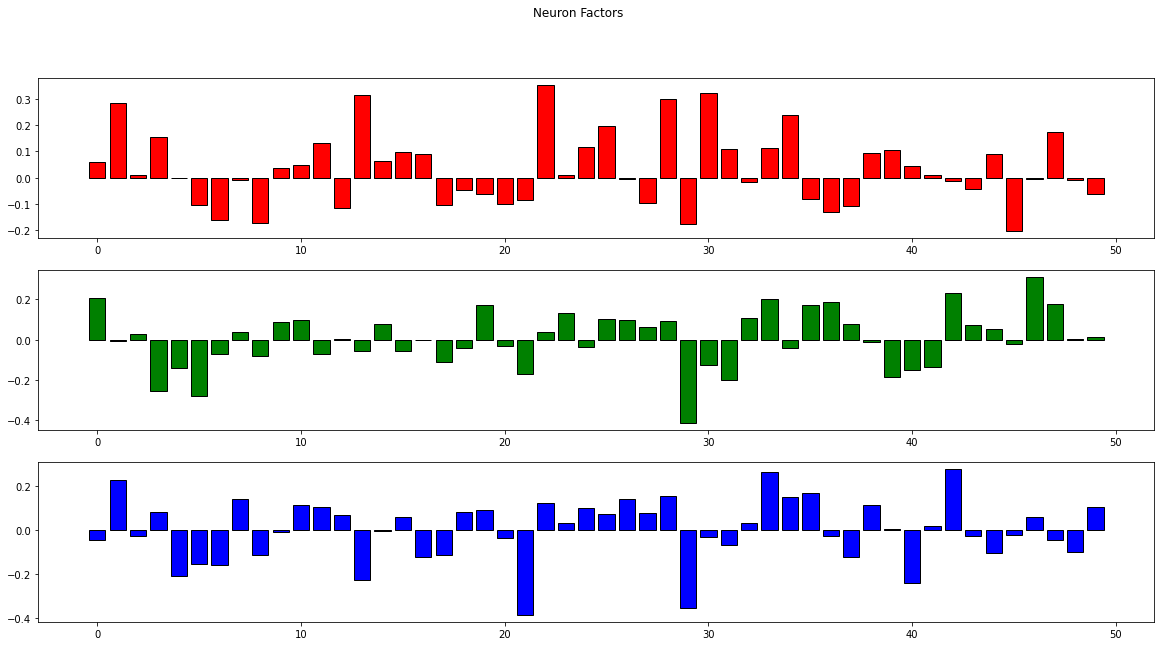

In [70]:
plotit(factor2, 'bar', 'Neuron Factors')

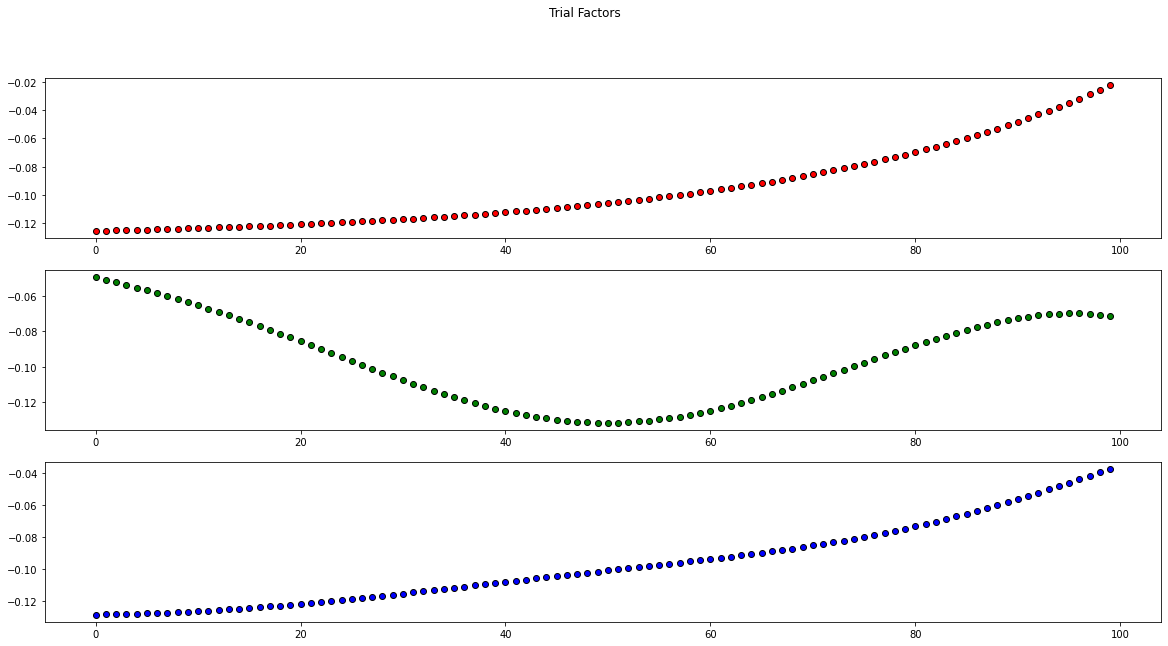

In [71]:
plotit(factor3, 'scatter', 'Trial Factors')

# Results

The time factor returns smooth curves for the first 3 ranks of the factor matrix. The top curve (red) starts off pretty much flat before some activity begins a downward trend. Neuron Activity is all over the place for the first (red) factor. For this red factor, it appears trial after trial tend to diverge. The second rank (green) has early activity in the temporal section then tends to die down until flattening out at the end. Neuron activity appears to be the lowest for this factor and trial to trial appears to converge  towards the end around -0.08. The 3rd rank (blue) temporally appears to flatten out at the end arond 0.0 like the red curve. Interstingly enough when temporal curves flatten out at 0, their trial to trial factors tend to diverge upwards
